<a href="https://colab.research.google.com/github/alekivetz/CMPT-2400/blob/main/NPRI_EDA_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries & Load the Dataset


Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
# Load the dataset
xls = pd.ExcelFile('NPRI_2000-2022.xlsx')

# Dataset contains multiple sheets
print(xls.sheet_names)

# Set pandas to display all columns and prevent line breaks in columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

['Releases 2000-2020', 'Disposals and Transfers 00-20', 'Comments']


The main factor of our prediction model will be pollutant releases over time, so we will focus on the releases sheet

In [4]:
df_original = pd.read_excel(xls, 'Releases 2000-2020')

Create a copy to avoid modifying original

In [5]:
df = df_original.copy()

Examine columns, remove French from headings for readability, remove blank spaces after release column names

In [6]:
df.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [7]:
# Rename all columns with French headings
df = df.rename(columns={
    'Reporting_Year / Année' : 'Reporting_Year',
    'NPRI_ID / No_INRP' : 'NPRI_ID',
    'Company_Name / Dénomination_sociale_de_l\'entreprise' : 'Company_Name',
    'Facility_Name / Installation' : 'Facility_Name',
    'NAICS / Code_SCIAN' : 'NAICS',
    'NAICS Title / Titre Code_SCIAN' : 'NAICS_Title',
    'CAS_Number / No_CAS' : 'CAS_Number',
    'Substance Name (English) / Nom de substance (Anglais)' : 'Substance_Name',
    'PROVINCE' : 'Province',
    'Units / Unités' : 'Units',
    'Estimation_Method / Méthode_d’estimation' : 'Estimation_Method',
    'Value / Valeur' : 'Value',
    'Release to Air - Other Non-Point ' : 'Release to Air - Other Non-Point',
    'Release to Air - Road dust  ' : 'Release to Air - Road dust',
    'Release to Air - Spills ' : 'Release to Air - Spills',
    'Release to Air - Stack / Point  ' : 'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling ' : 'Release to Air - Storage / Handling',
    'Releases to Land - Other ' : 'Releases to Land - Other',
    'Releases to Land - Spills ' : 'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges ' : 'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Spills ' : 'Releases to Water Bodies - Spills'

})

df.head()

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS_Title,Province,City,Latitude,Longitude,CAS_Number,Substance_Name,Units,Estimation_Method,Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,E - Emission Factor,NaN,NaN,NaN,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,M - Monitoring or Direct Measurement,NaN,NaN,NaN,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function to extract and display basic info about the dataset

In [8]:
def dataframe_summary(dataframe):
  print('Dataset Summary')
  print('-' * 106)

  # Shape
  print(f'Number of rows: {df.shape[0]}')
  print(f'Number of columns: {df.shape[1]}')

  print('\nColumn Overview')
  print('-' * 106)

  # Data types, missing value counts, and unique values
  summary = pd.DataFrame({
      'Data Type': df.dtypes,
      'Missing Values': df.isnull().sum(),
      'Missing Values (%)': round(df.isnull().sum() / len(df) * 100, 2),
      'Unique Values': df.nunique()
  })

  print(summary)
  print('-' * 106)

# Call function for our dataframe
dataframe_summary(df)

Dataset Summary
----------------------------------------------------------------------------------------------------------
Number of rows: 737516
Number of columns: 28

Column Overview
----------------------------------------------------------------------------------------------------------
                                             Data Type  Missing Values  Missing Values (%)  Unique Values
Reporting_Year                                   int64               0                0.00             23
NPRI_ID                                          int64               0                0.00          21868
Number of employees                             object             616                0.08           1884
Company_Name                                    object               0                0.00           9859
Facility_Name                                   object            1176                0.16          32102
NAICS                                            int64               0  

**Column Descriptions**

Reporting_Year: The year in which the environmental data was reported by the company or facility.

NPRI_ID: A unique identifier assigned to each facility or company reporting data in the NPRI.

Number of employees: The number of employees working at the company or facility.

Company_Name: The name of the company reporting environmental data.

Facility_Name: The name of the facility where the environmental releases are taking place.

NAICS: The North American Industry Classification System (NAICS) code that represents the industry in which the company or facility operates.

NAICS Title: The title or description of the NAICS code.

City: The city in which the company or facility is located.

Latitude: The latitude coordinate of the facility's location.

Longitude: The longitude coordinate of the facility's location.

CAS_Number: The Chemical Abstracts Service (CAS) registry number for the substance being released, used for identifying chemicals.

Substance Name: The name of the substance being released.

Units: The units used for measuring how much of the substance is released.

Estimation_Method: The method used to estimate the quantity of the release or disposal of the substance.

Release to Air - Fugitive: Amount of the substance released into the air from fugitive sources (e.g., leaks, vents).

Release to Air - Other Non-Point: Releases to air from other non-point sources (e.g., surface area emissions).

Release to Air - Road Dust: Amount of the substance released into the air due to road dust.

Release to Air - Spills: Amount of the substance released into the air as a result of spills.

Release to Air - Stack / Point: Amount of the substance released into the air from stack or point sources (e.g., smokestacks, chimneys).

Release to Air - Storage / Handling: Amount of the substance released into the air due to the storage or handling of materials.

Releases to Land - Leaks: Amount of the substance released to land due to leaks from a facility or equipment.

Releases to Land - Other: Releases to land that do not fall under specific categories like leaks or spills.

Releases to Land - Spills: Amount of the substance released to land from spills.

Releases to Water Bodies - Direct Discharges: Releases directly discharged into water bodies, such as rivers, lakes, or streams.

Releases to Water Bodies - Leaks: Releases to water bodies from leaks.

Releases to Water Bodies - Spills: Amount of the substance released into water bodies due to spills.

Sum of release to all media (<1tonne): A summary of all releases to air, land, and water, with a value of less than 1 tonne.

****
Based on the column descriptions above, our relevant columns will include Reporting_Year, NAICS and NAICS Title, and the release columns.

***
Examining NAICS and NAICS Title
***

Based on the value counts for these columns below, grouping industries by their NAICS code will help us to simplify our analysis and improve our model's performance. We will add a new column to our dataset that stores this information.

NAICS Code Classification taken from

https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1181553

In [35]:
df['NAICS'].value_counts()

,count
NAICS,
211113,120204
211110,107769
221112,23409
322112,22528
324110,21346
...,...
441320,1
112330,1
311830,1


In [33]:
df['NAICS_Title'].value_counts()

,count
NAICS_Title,
Conventional oil and gas extraction,120204
Oil and gas extraction (except oil sands),107769
Fossil-fuel electric power generation,23409
Chemical pulp mills,22528
Petroleum refineries,21346
...,...
Tortilla Manufacturing,1
Animal Aquaculture,1
Other Specialty-Line Building Supplies Wholesaler-Distributors,1


In [36]:
# Convert NAICS code to string
df['NAICS'] = df['NAICS'].astype(str)

# Define NAICS groups
def categorize_naics(naics_code):
    if naics_code.startswith('11'):
        return 'Agriculture, Forestry, Fishing and Hunting'
    elif naics_code.startswith('21'):
        return 'Mining, Quarrying, and Oil and Gas Extraction'
    elif naics_code.startswith('22'):
        return 'Utilities'
    elif naics_code.startswith('23'):
        return 'Construction'
    elif naics_code.startswith('31') or naics_code.startswith('32') or naics_code.startswith('33'):
        return 'Manufacturing'
    elif naics_code.startswith('41'):
        return 'Wholesale Trade'
    elif naics_code.startswith('44') or naics_code.startswith('45'):
        return 'Retail Trade'
    elif naics_code.startswith('48') or naics_code.startswith('49'):
        return 'Transportation and Warehousing'
    elif naics_code.startswith('51'):
        return 'Information and Cultural Industries'
    elif naics_code.startswith('52'):
        return 'Finance and Insurance'
    elif naics_code.startswith('53'):
        return 'Real Estate and Rental and Leasing'
    elif naics_code.startswith('54'):
        return 'Professional, Scientific, and Technical Services'
    elif naics_code.startswith('55'):
        return 'Management of Companies and Enterprises'
    elif naics_code.startswith('56'):
        return 'Administrative and Support and Waste Management and Remediation Services'
    elif naics_code.startswith('61'):
        return 'Educational Services'
    elif naics_code.startswith('62'):
        return 'Health Care and Social Assistance'
    elif naics_code.startswith('71'):
        return 'Arts, Entertainment, and Recreation'
    elif naics_code.startswith('72'):
        return 'Accommodation and Food Services'
    elif naics_code.startswith('81'):
        return 'Other Services (except Public Administration)'
    elif naics_code.startswith('92'):
        return 'Public Administration'
    else:
        return 'Unknown' # Catch-all

# Apply the function to create a new column
df['Industry'] = df['NAICS'].apply(categorize_naics)

In [37]:
df['Industry'].value_counts()

,count
Industry,
Manufacturing,319246
"Mining, Quarrying, and Oil and Gas Extraction",292679
Utilities,51112
Wholesale Trade,25414
Transportation and Warehousing,20186
Administrative and Support and Waste Management and Remediation Services,15659
"Agriculture, Forestry, Fishing and Hunting",2647
Educational Services,2386
Unknown,2319


# 2. Outliers

In [9]:
# List of all release columns
release_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

# Release columns grouped
air_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling'
]

land_columns = [
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills'
]

water_columns = [
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills'
]


We will create histograms to see which columns have potential outliers.

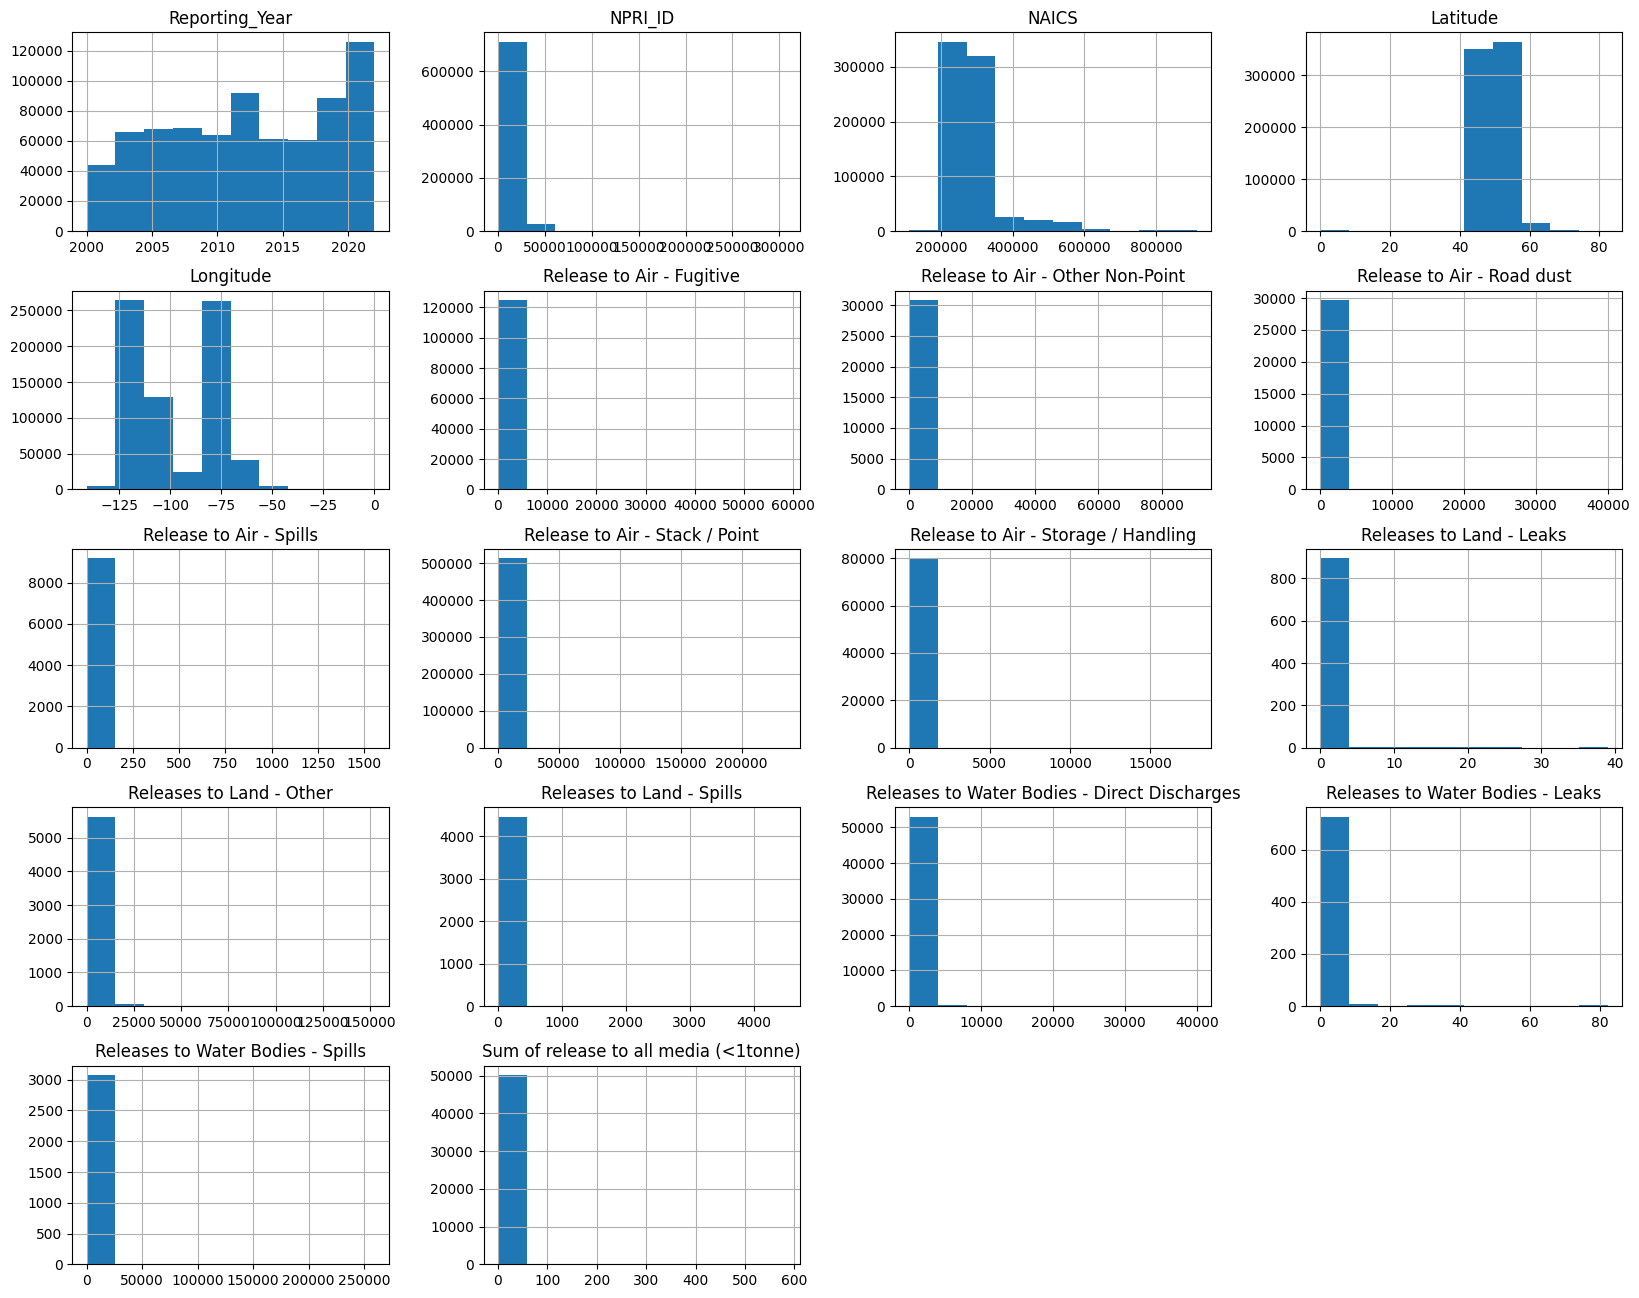

In [10]:
# All histograms

df.hist(figsize=(20, 16))
plt.show()

We will focus on outliers in the release columns.

In [13]:
# Generate statistics for each release column, showing potential outliers using IQR method

for col in release_columns:
    print('-' * 60)
    print(f"Statistics for {col}:\n")

    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    print(f'Mean: {df[col].mean():.2f}')
    print(f'Standard Deviation: {df[col].std():.2f}')
    print(f'Minimum: {df[col].min()}')
    print(f'Q1: {Q1}')
    print(f'Median: {df[col].median()}')
    print(f'Q3: {Q3}')
    print(f'Maximum: {df[col].max()}')

    print(f'\nUpper Limit: {upper_limit:.2f}')
    print(f'Lower Limit: {lower_limit:.2f}')

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    percentage = len(outliers) / df[col].count() * 100

    print(f'\nOutliers in {col}: {len(outliers)}, which represents {percentage:.2f}% of data points.\n')


------------------------------------------------------------
Statistics for Release to Air - Fugitive:

Mean: 61.16
Standard Deviation: 797.57
Minimum: 0.0
Q1: 0.051
Median: 0.796
Q3: 7.582
Maximum: 58433.9

Upper Limit: 18.88
Lower Limit: -11.25

Outliers in Release to Air - Fugitive: 19942, which represents 15.95% of data points.

------------------------------------------------------------
Statistics for Release to Air - Other Non-Point:

Mean: 91.46
Standard Deviation: 1628.91
Minimum: 0.0
Q1: 0.013
Median: 0.49
Q3: 7.4585
Maximum: 91138.2

Upper Limit: 18.63
Lower Limit: -11.16

Outliers in Release to Air - Other Non-Point: 5199, which represents 16.84% of data points.

------------------------------------------------------------
Statistics for Release to Air - Road dust:

Mean: 117.24
Standard Deviation: 856.01
Minimum: 0.0
Q1: 0.5054
Median: 3.5619
Q3: 22.0
Maximum: 39992.961045

Upper Limit: 54.24
Lower Limit: -31.74

Outliers in Release to Air - Road dust: 4147, which represen

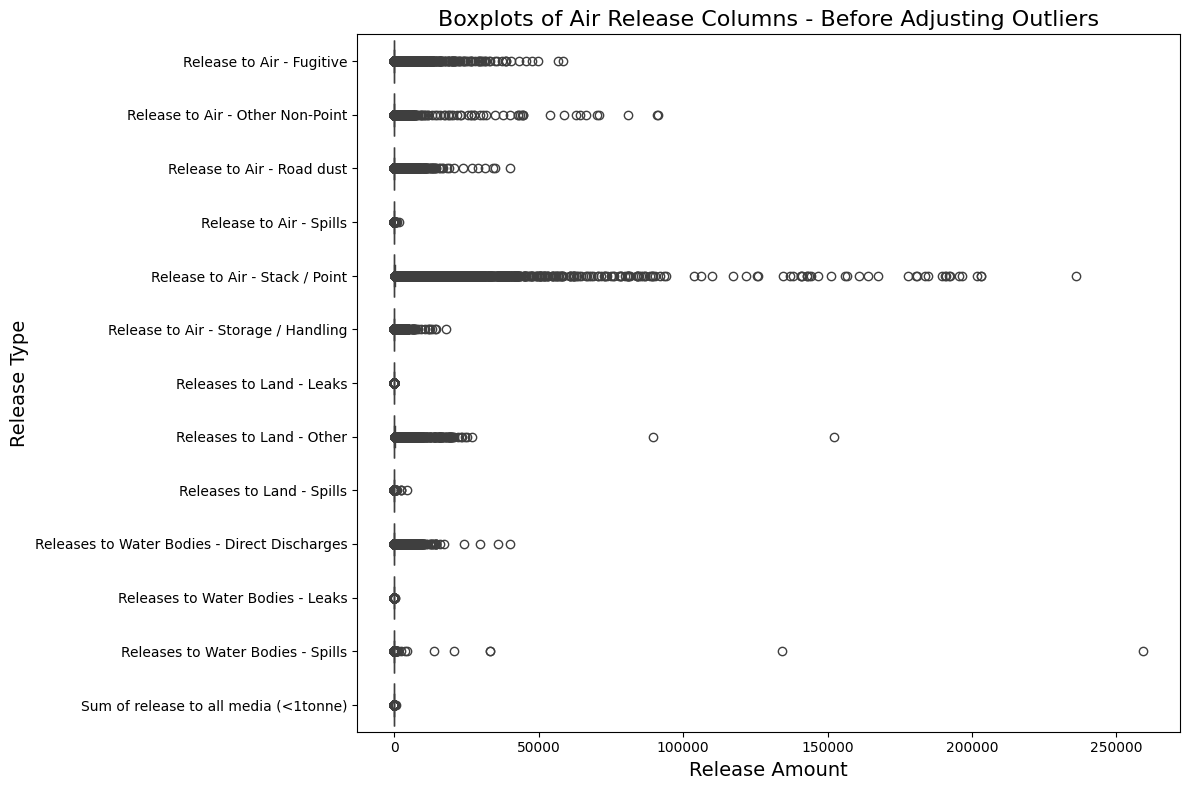

In [19]:
# Boxplots for All Release Columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[release_columns], orient='h')
plt.title('Boxplots of Air Release Columns - Before Adjusting Outliers', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

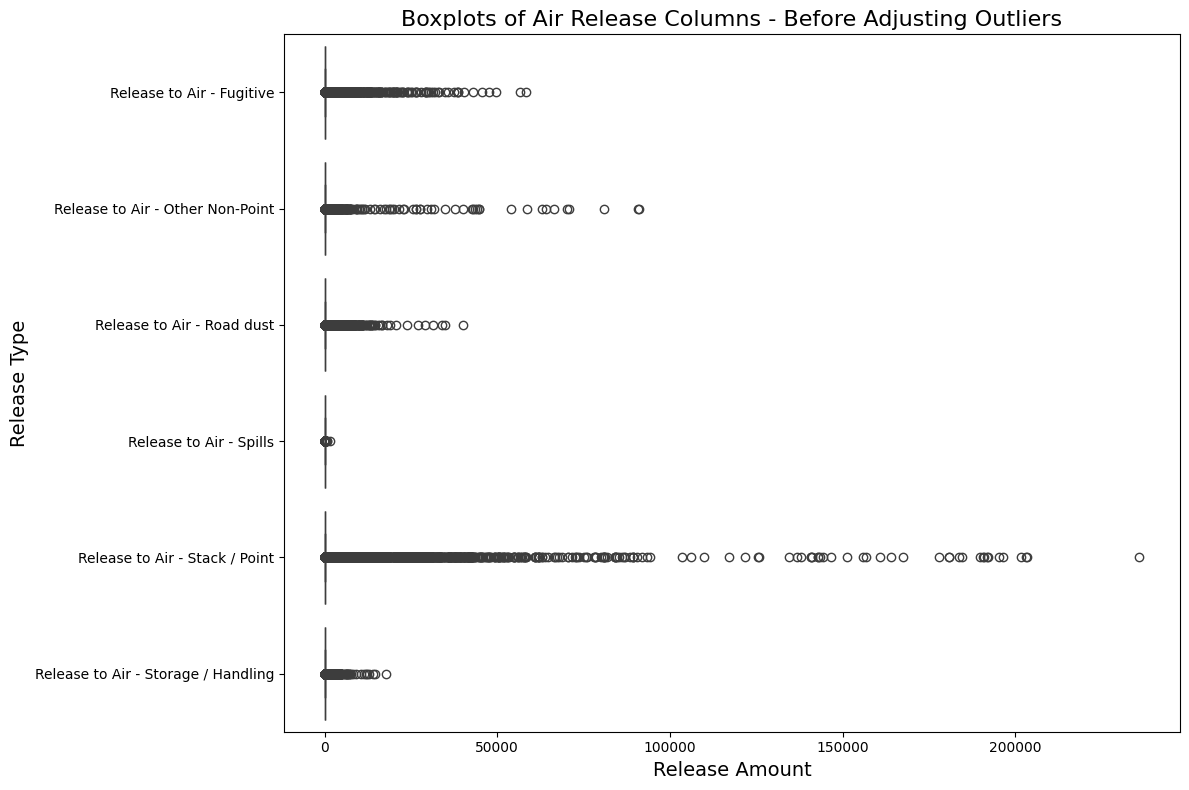

In [15]:
# Boxplots for Air Release Columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[air_columns], orient='h')
plt.title('Boxplots of Air Release Columns - Before Adjusting Outliers', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


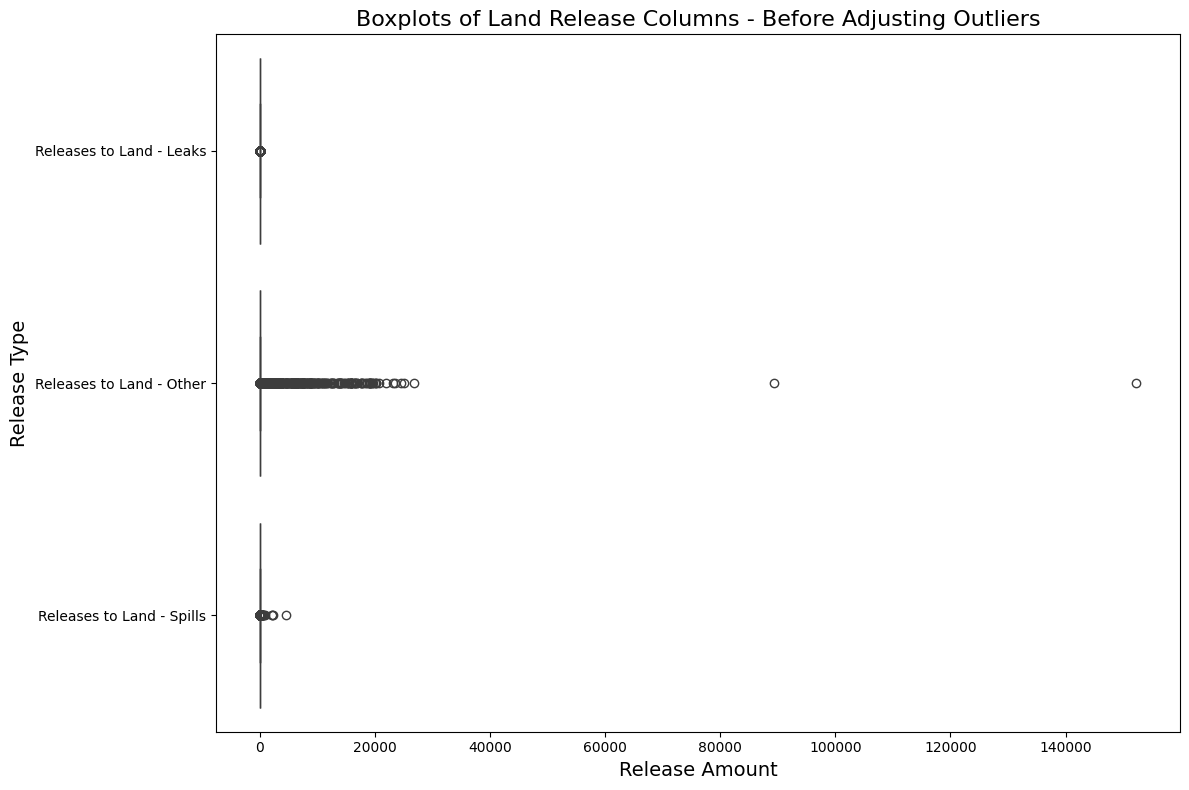

In [17]:
# Boxplots for Land Release Columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[land_columns], orient='h')
plt.title('Boxplots of Land Release Columns - Before Adjusting Outliers', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


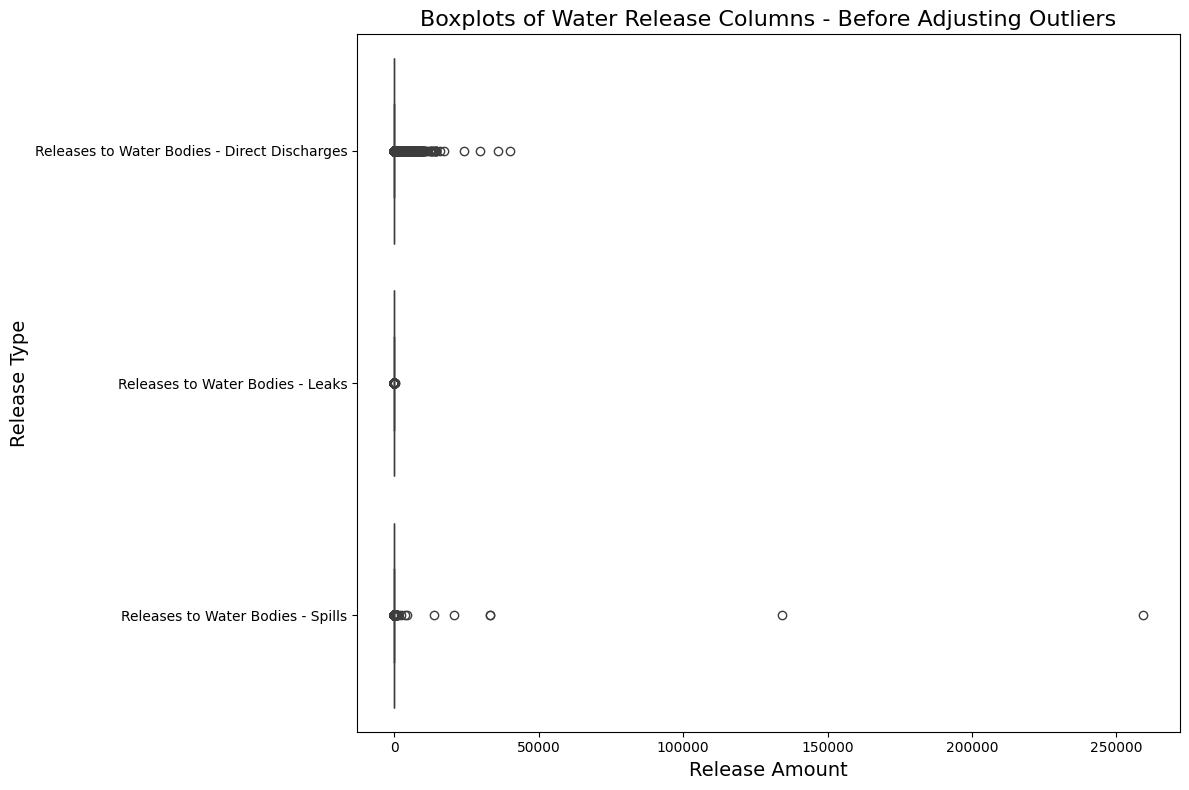

In [18]:
# Boxplots for Water Release Columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[water_columns], orient='h')
plt.title('Boxplots of Water Release Columns - Before Adjusting Outliers', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


We can see from the statistical summary above as well as the boxplots that there are many outliers in the release columns.

We will replace outliers with the median value for each column using the IQR method.

In [20]:
for col in release_columns:

    # Calculate all values
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    median = df[col].median()

    # Replace outliers with median
    df[col] = df[col].apply(lambda x: median if x > upper_limit or x < lower_limit else x)

We will now generate the boxplots again with the adjusted values.

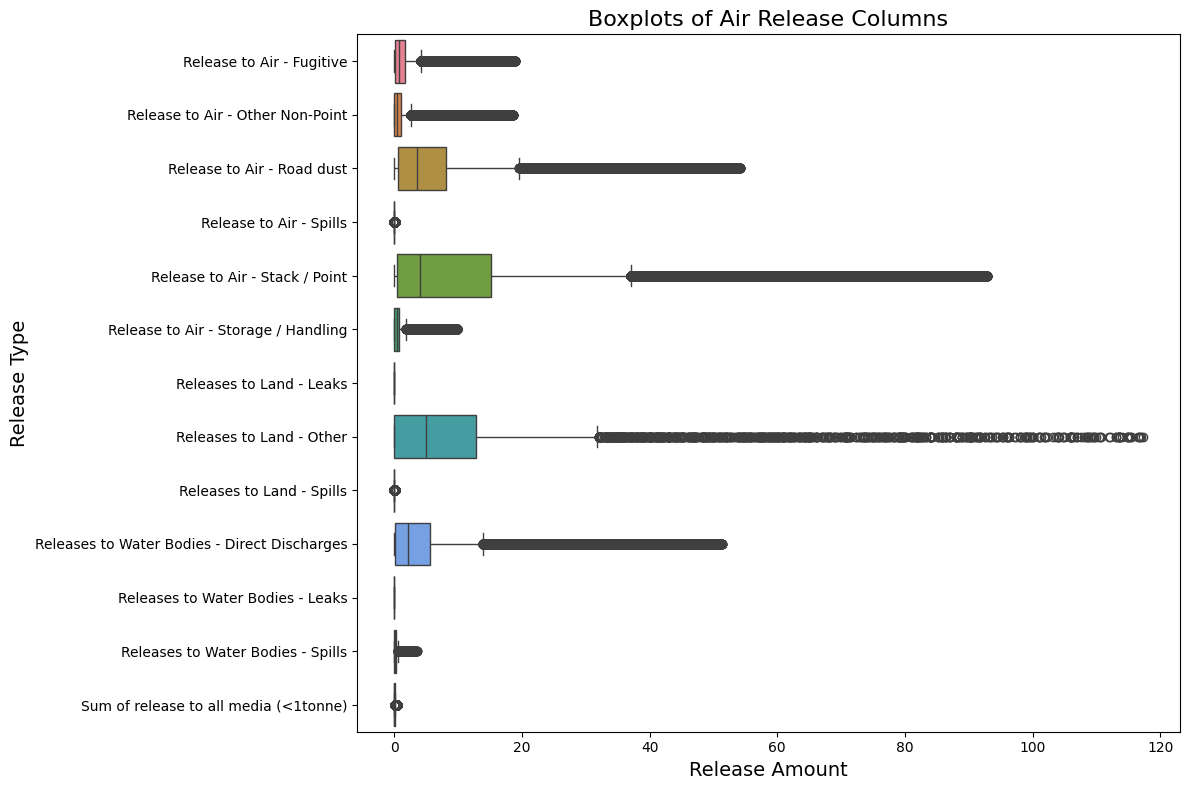

In [21]:
# Boxplots for All Release Columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[release_columns], orient='h')
plt.title('Boxplots of Air Release Columns', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

# 3. Visualizations

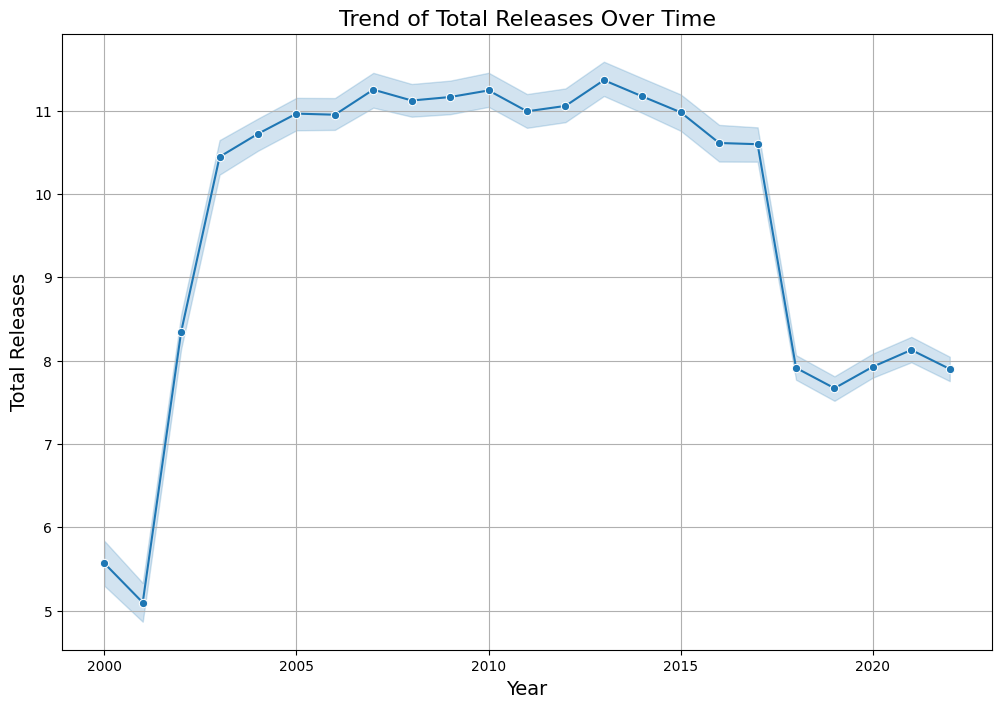

In [24]:
# Releases trend over time

df['Total_Releases'] = df[release_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Reporting_Year', y='Total_Releases', marker='o')
plt.title('Trend of Total Releases Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.grid(True)
plt.show()

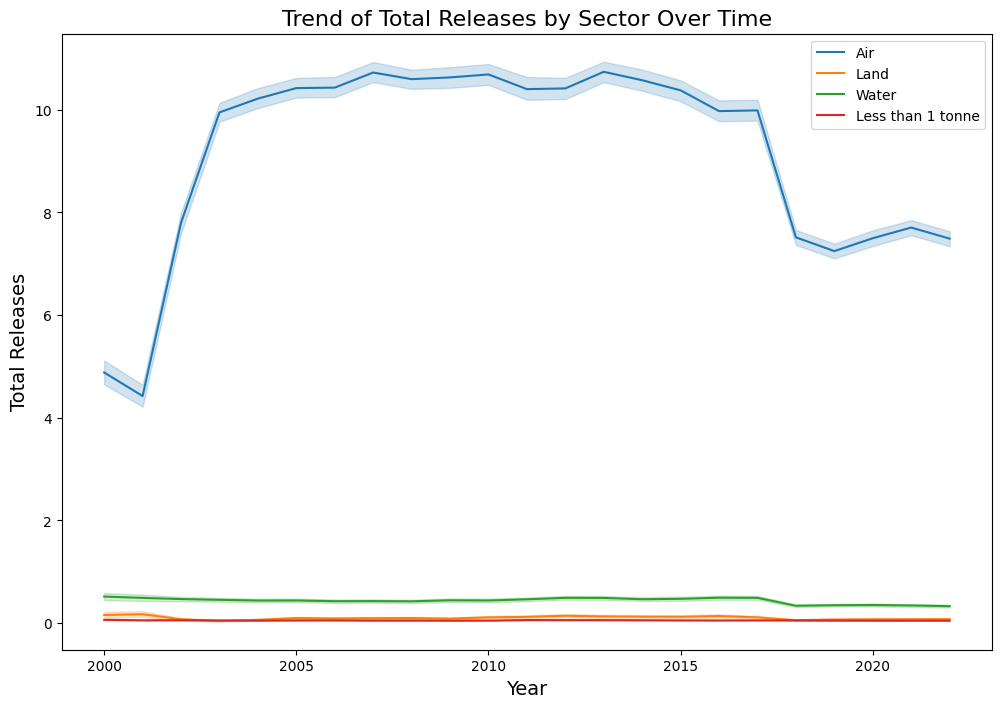

In [25]:
# Releases trends by sector
df['Total_Air_Releases'] = df[air_columns].sum(axis=1)
df['Total_Land_Releases'] = df[land_columns].sum(axis=1)
df['Total_Water_Releases'] = df[water_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Reporting_Year', y='Total_Air_Releases', label='Air')
sns.lineplot(data=df, x='Reporting_Year', y='Total_Land_Releases', label='Land')
sns.lineplot(data=df, x='Reporting_Year', y='Total_Water_Releases', label='Water')
sns.lineplot(data=df, x='Reporting_Year', y='Sum of release to all media (<1tonne)', label='Less than 1 tonne')
plt.title('Trend of Total Releases by Sector Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.legend()
plt.show()

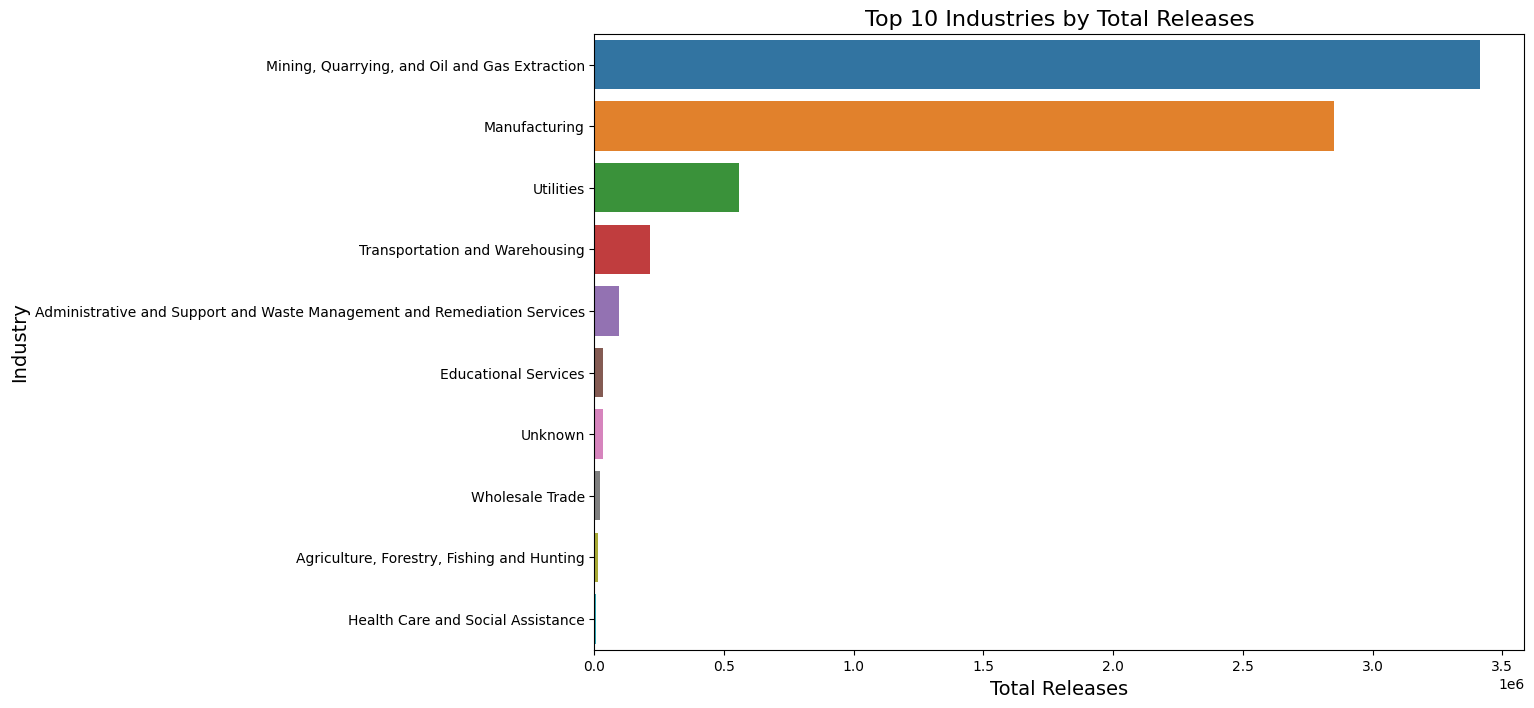

In [48]:
# Top 10 Industries Overall

# Aggregate total releases by industry
industry_totals = df.groupby('Industry')['Total_Releases'].sum().nlargest(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_totals.values, y=industry_totals.index, hue=industry_totals.index)
plt.xlabel('Total Releases', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.title('Top 10 Industries by Total Releases', fontsize=16)
plt.xlabel('Total Releases', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.show()



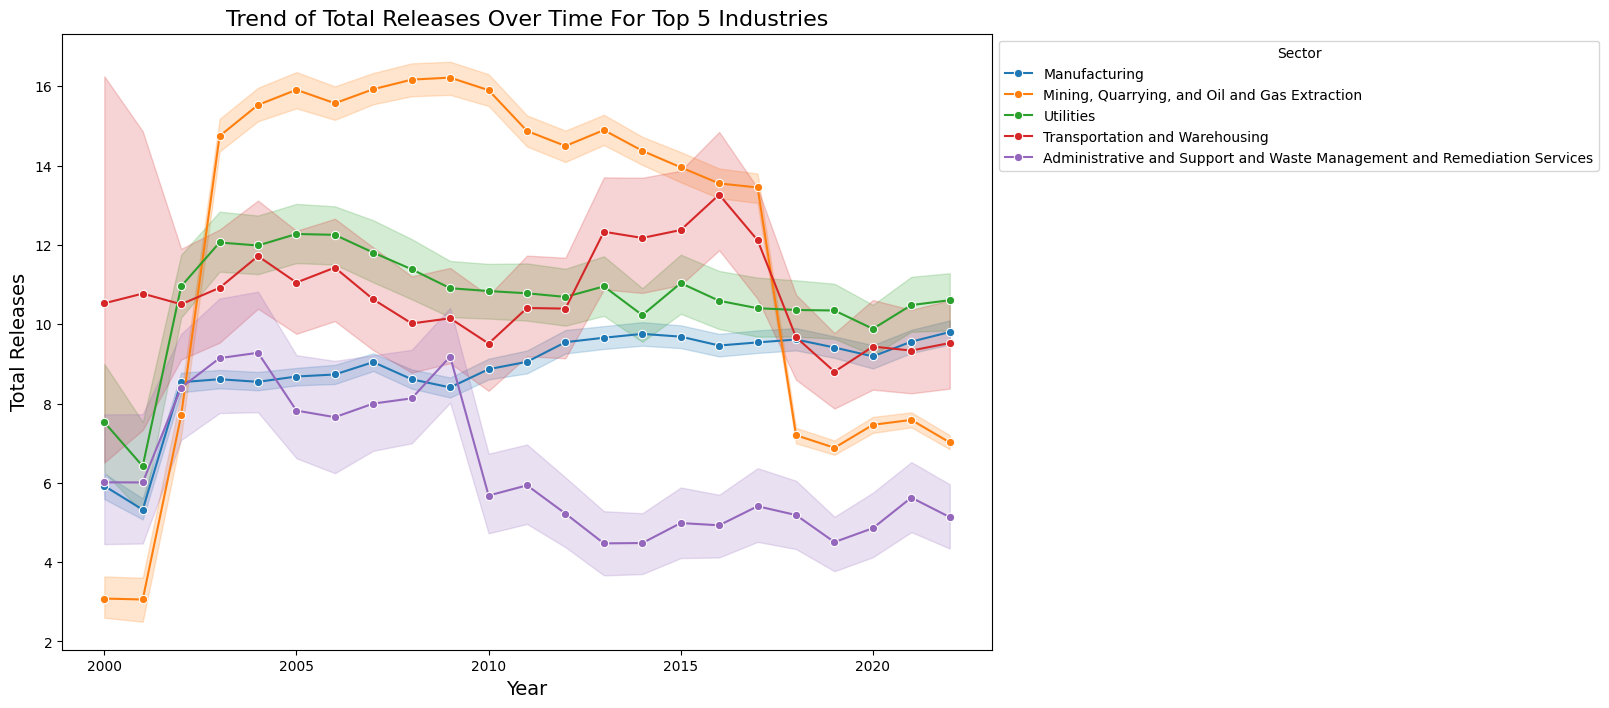

In [49]:
# Industry Trends Over Time (Top 5 Industries)

top_sectors = df.groupby('Industry')['Total_Releases'].sum().nlargest(5)
df_top_sectors = df[df['Industry'].isin(top_sectors.index)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_sectors, x='Reporting_Year', y='Total_Releases', hue='Industry', marker='o')
plt.title('Trend of Total Releases Over Time For Top 5 Industries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()